## Imports & Stuff

In [1]:
import pandas as pd
## pandas 1.1.1 necessary
import numpy as np
import string 
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import math
from gensim.models import Word2Vec
from plotly.graph_objects import Scatter3d

In [2]:
! pwd

/home/conte/code/kiddbenji/delphes/notebooks/kiddbenji_notebooks


In [4]:
data = pd.read_pickle('../../delphes/data/extended_tweet_df')

In [5]:
test_data = data[data['country'] == 'Ireland']

## Preprocessing

In [6]:
# Remove the undesirable elements in the entire dataframe
def rmurl_df(df, column_name):
    '''
    This function removes all the URLs, the #hashtag and the @user of a column made of strings.
    Be careful to apply it BEFORE all the other preprocessing steps (if not it wont'
    be recognized as a URL)
    '''
    df = df.copy()
    df[column_name] = df[column_name].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)
    return df

In [7]:
# Lowercase the tweet's column
def lower_df(df, column_name):
    '''
    This function lowercases a column made of strings.
    '''
    df = df.copy()
    df[column_name] = df[column_name].str.lower()
    return df

In [8]:
# Remove the numbers in the tweet's column
def rmnumbers_df(df, column_name):
    '''
    This function removes all the digits of a column made of strings.
    '''
    df = df.copy()
    def remove_numbers(text):
        return ''.join(word for word in text if not word.isdigit())
    df[column_name] = df[column_name].apply(remove_numbers)
    return df

In [9]:
# Remove the undesirable punctuations in the tweet's column
def rmpunct_df(df, column_name):
    '''
    This function removes all the punctuations, all the "rt" and remove multiple spaces
    of a column made of strings.
    '''
    punct = string.punctuation
    df = df.copy()
    def replace_punct(text):
        for punctu in punct:
            text = text.replace(punctu, ' ')
            text = text.replace(' rt ','')
            text = " ".join(text.split())
        return text
    df[column_name] = df[column_name].apply(replace_punct)
    return df

In [10]:
# Remove the undesirable emojis in the entire dataframe
def rmemojis_df(df):
    '''
    This function removes all the emojis of a column made of strings.
    Be careful to translate in latin alphabet before applying this function : 
    it also removes cyrillic alphabet
    '''
    df = df.copy()
    df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
    return df

In [11]:
test_data = rmurl_df(test_data, 'content')
test_data = lower_df(test_data, 'content')
test_data = rmnumbers_df(test_data, 'content')
test_data = rmpunct_df(test_data, 'content')
test_data = rmemojis_df(test_data)

In [12]:
test_data = test_data.reset_index()

## Word2Vec 

In [14]:
sentences = list(test_data['content'])

In [15]:
sentences_train = []
for sentence in sentences:
    sentences_train.append(sentence.split())

## TF-IDF

In [16]:
def word2vec_embedding(sentences,size,min_count):
    ### build word embedding for each reviews
    word2vec_model = Word2Vec(sentences, size=size, min_count=min_count)
    return word2vec_model

In [17]:
def weight_of_words(text):
    #takes text and returns a dictionary with the word and its weight
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit(text)
    weight_of_words = dict(zip(X.get_feature_names(),X.idf_))
    return weight_of_words

In [18]:
weight_of_words(sentences)

{'aa': 8.313553664880422,
 'abandoned': 7.620406484320476,
 'abandonment': 8.313553664880422,
 'abela': 8.313553664880422,
 'abhorrence': 8.313553664880422,
 'abiding': 8.313553664880422,
 'ability': 7.3972629330062665,
 'abject': 8.313553664880422,
 'able': 5.828647015092422,
 'ableism': 8.313553664880422,
 'abolish': 8.313553664880422,
 'abomination': 7.908088556772258,
 'about': 3.7440106565354814,
 'above': 6.927259303760531,
 'abroad': 6.608805572641996,
 'absence': 7.3972629330062665,
 'absent': 8.313553664880422,
 'absolute': 7.2149413762123125,
 'absolutely': 6.298650644338157,
 'abstained': 8.313553664880422,
 'abstentions': 8.313553664880422,
 'absurdity': 8.313553664880422,
 'abundance': 8.313553664880422,
 'abuse': 7.3972629330062665,
 'abuses': 8.313553664880422,
 'abysmal': 8.313553664880422,
 'academia': 7.908088556772258,
 'academic': 8.313553664880422,
 'academy': 7.908088556772258,
 'acc': 8.313553664880422,
 'accelerate': 7.908088556772258,
 'accelerated': 7.90808855

In [19]:
tweet_vecs = []
def weighted_words(text, weight_of_words, word2vec):
    #returns a list of n_tweets dimensions containing a (1,100) vector for each word
    check = 0
    for sentence in text:
        divided_sentence = sentence.split(' ')
        new_vecs = []
        for word in divided_sentence: 
            if word in weight_of_words.keys():
                pondered = word2vec.wv.get_vector(word).reshape(1, 100)
                check += 1
                print(check)
                pondered_word = pondered*weight_of_words[word]
                new_vecs.append(pondered_word)
            else:
                continue
        tweet_vecs.append(new_vecs)
    return tweet_vecs

In [20]:
tryout = weighted_words(sentences, weight_of_words(sentences),word2vec_embedding(sentences=sentences_train, size=100, min_count=1))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682


4988
4989
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187


7705
7706
7707
7708
7709
7710
7711
7712
7713
7714
7715
7716
7717
7718
7719
7720
7721
7722
7723
7724
7725
7726
7727
7728
7729
7730
7731
7732
7733
7734
7735
7736
7737
7738
7739
7740
7741
7742
7743
7744
7745
7746
7747
7748
7749
7750
7751
7752
7753
7754
7755
7756
7757
7758
7759
7760
7761
7762
7763
7764
7765
7766
7767
7768
7769
7770
7771
7772
7773
7774
7775
7776
7777
7778
7779
7780
7781
7782
7783
7784
7785
7786
7787
7788
7789
7790
7791
7792
7793
7794
7795
7796
7797
7798
7799
7800
7801
7802
7803
7804
7805
7806
7807
7808
7809
7810
7811
7812
7813
7814
7815
7816
7817
7818
7819
7820
7821
7822
7823
7824
7825
7826
7827
7828
7829
7830
7831
7832
7833
7834
7835
7836
7837
7838
7839
7840
7841
7842
7843
7844
7845
7846
7847
7848
7849
7850
7851
7852
7853
7854
7855
7856
7857
7858
7859
7860
7861
7862
7863
7864
7865
7866
7867
7868
7869
7870
7871
7872
7873
7874
7875
7876
7877
7878
7879
7880
7881
7882
7883
7884
7885
7886
7887
7888
7889
7890
7891
7892
7893
7894
7895
7896
7897
7898
7899
7900
7901
7902
7903
7904


10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
10431
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
10476
10477
10478
10479
10480
10481
10482
10483
10484
10485
10486
10487
10488
10489
10490
10491
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
1054

11830
11831
11832
11833
11834
11835
11836
11837
11838
11839
11840
11841
11842
11843
11844
11845
11846
11847
11848
11849
11850
11851
11852
11853
11854
11855
11856
11857
11858
11859
11860
11861
11862
11863
11864
11865
11866
11867
11868
11869
11870
11871
11872
11873
11874
11875
11876
11877
11878
11879
11880
11881
11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11893
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
1199

13780
13781
13782
13783
13784
13785
13786
13787
13788
13789
13790
13791
13792
13793
13794
13795
13796
13797
13798
13799
13800
13801
13802
13803
13804
13805
13806
13807
13808
13809
13810
13811
13812
13813
13814
13815
13816
13817
13818
13819
13820
13821
13822
13823
13824
13825
13826
13827
13828
13829
13830
13831
13832
13833
13834
13835
13836
13837
13838
13839
13840
13841
13842
13843
13844
13845
13846
13847
13848
13849
13850
13851
13852
13853
13854
13855
13856
13857
13858
13859
13860
13861
13862
13863
13864
13865
13866
13867
13868
13869
13870
13871
13872
13873
13874
13875
13876
13877
13878
13879
13880
13881
13882
13883
13884
13885
13886
13887
13888
13889
13890
13891
13892
13893
13894
13895
13896
13897
13898
13899
13900
13901
13902
13903
13904
13905
13906
13907
13908
13909
13910
13911
13912
13913
13914
13915
13916
13917
13918
13919
13920
13921
13922
13923
13924
13925
13926
13927
13928
13929
13930
13931
13932
13933
13934
13935
13936
13937
13938
13939
13940
13941
13942
13943
13944
13945
1394

16091
16092
16093
16094
16095
16096
16097
16098
16099
16100
16101
16102
16103
16104
16105
16106
16107
16108
16109
16110
16111
16112
16113
16114
16115
16116
16117
16118
16119
16120
16121
16122
16123
16124
16125
16126
16127
16128
16129
16130
16131
16132
16133
16134
16135
16136
16137
16138
16139
16140
16141
16142
16143
16144
16145
16146
16147
16148
16149
16150
16151
16152
16153
16154
16155
16156
16157
16158
16159
16160
16161
16162
16163
16164
16165
16166
16167
16168
16169
16170
16171
16172
16173
16174
16175
16176
16177
16178
16179
16180
16181
16182
16183
16184
16185
16186
16187
16188
16189
16190
16191
16192
16193
16194
16195
16196
16197
16198
16199
16200
16201
16202
16203
16204
16205
16206
16207
16208
16209
16210
16211
16212
16213
16214
16215
16216
16217
16218
16219
16220
16221
16222
16223
16224
16225
16226
16227
16228
16229
16230
16231
16232
16233
16234
16235
16236
16237
16238
16239
16240
16241
16242
16243
16244
16245
16246
16247
16248
16249
16250
16251
16252
16253
16254
16255
16256
1625

18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18445
18446
18447
18448
18449
18450
18451
18452
18453
18454
18455
18456
18457
18458
18459
18460
18461
18462
18463
18464
18465
18466
18467
18468
18469
18470
18471
18472
18473
18474
18475
18476
18477
18478
18479
18480
18481
18482
18483
18484
18485
18486
18487
18488
18489
18490
18491
18492
18493
18494
18495
18496
18497
18498
18499
18500
18501
18502
18503
18504
18505
18506
18507
18508
18509
18510
18511
18512
18513
18514
18515
18516
18517
18518
18519
18520
18521
18522
18523
18524
18525
18526
18527
18528
18529
18530
18531
18532
18533
18534
18535
18536
18537
18538
18539
18540
18541
18542
18543
18544
18545
18546
18547
18548
18549
18550
18551
18552
18553
18554
18555
18556
18557
18558
18559
18560
18561
18562
18563
18564
18565
18566
18567
18568
18569
18570
18571
1857

20602
20603
20604
20605
20606
20607
20608
20609
20610
20611
20612
20613
20614
20615
20616
20617
20618
20619
20620
20621
20622
20623
20624
20625
20626
20627
20628
20629
20630
20631
20632
20633
20634
20635
20636
20637
20638
20639
20640
20641
20642
20643
20644
20645
20646
20647
20648
20649
20650
20651
20652
20653
20654
20655
20656
20657
20658
20659
20660
20661
20662
20663
20664
20665
20666
20667
20668
20669
20670
20671
20672
20673
20674
20675
20676
20677
20678
20679
20680
20681
20682
20683
20684
20685
20686
20687
20688
20689
20690
20691
20692
20693
20694
20695
20696
20697
20698
20699
20700
20701
20702
20703
20704
20705
20706
20707
20708
20709
20710
20711
20712
20713
20714
20715
20716
20717
20718
20719
20720
20721
20722
20723
20724
20725
20726
20727
20728
20729
20730
20731
20732
20733
20734
20735
20736
20737
20738
20739
20740
20741
20742
20743
20744
20745
20746
20747
20748
20749
20750
20751
20752
20753
20754
20755
20756
20757
20758
20759
20760
20761
20762
20763
20764
20765
20766
20767
2076

23115
23116
23117
23118
23119
23120
23121
23122
23123
23124
23125
23126
23127
23128
23129
23130
23131
23132
23133
23134
23135
23136
23137
23138
23139
23140
23141
23142
23143
23144
23145
23146
23147
23148
23149
23150
23151
23152
23153
23154
23155
23156
23157
23158
23159
23160
23161
23162
23163
23164
23165
23166
23167
23168
23169
23170
23171
23172
23173
23174
23175
23176
23177
23178
23179
23180
23181
23182
23183
23184
23185
23186
23187
23188
23189
23190
23191
23192
23193
23194
23195
23196
23197
23198
23199
23200
23201
23202
23203
23204
23205
23206
23207
23208
23209
23210
23211
23212
23213
23214
23215
23216
23217
23218
23219
23220
23221
23222
23223
23224
23225
23226
23227
23228
23229
23230
23231
23232
23233
23234
23235
23236
23237
23238
23239
23240
23241
23242
23243
23244
23245
23246
23247
23248
23249
23250
23251
23252
23253
23254
23255
23256
23257
23258
23259
23260
23261
23262
23263
23264
23265
23266
23267
23268
23269
23270
23271
23272
23273
23274
23275
23276
23277
23278
23279
23280
2328

24510
24511
24512
24513
24514
24515
24516
24517
24518
24519
24520
24521
24522
24523
24524
24525
24526
24527
24528
24529
24530
24531
24532
24533
24534
24535
24536
24537
24538
24539
24540
24541
24542
24543
24544
24545
24546
24547
24548
24549
24550
24551
24552
24553
24554
24555
24556
24557
24558
24559
24560
24561
24562
24563
24564
24565
24566
24567
24568
24569
24570
24571
24572
24573
24574
24575
24576
24577
24578
24579
24580
24581
24582
24583
24584
24585
24586
24587
24588
24589
24590
24591
24592
24593
24594
24595
24596
24597
24598
24599
24600
24601
24602
24603
24604
24605
24606
24607
24608
24609
24610
24611
24612
24613
24614
24615
24616
24617
24618
24619
24620
24621
24622
24623
24624
24625
24626
24627
24628
24629
24630
24631
24632
24633
24634
24635
24636
24637
24638
24639
24640
24641
24642
24643
24644
24645
24646
24647
24648
24649
24650
24651
24652
24653
24654
24655
24656
24657
24658
24659
24660
24661
24662
24663
24664
24665
24666
24667
24668
24669
24670
24671
24672
24673
24674
24675
2467

26685
26686
26687
26688
26689
26690
26691
26692
26693
26694
26695
26696
26697
26698
26699
26700
26701
26702
26703
26704
26705
26706
26707
26708
26709
26710
26711
26712
26713
26714
26715
26716
26717
26718
26719
26720
26721
26722
26723
26724
26725
26726
26727
26728
26729
26730
26731
26732
26733
26734
26735
26736
26737
26738
26739
26740
26741
26742
26743
26744
26745
26746
26747
26748
26749
26750
26751
26752
26753
26754
26755
26756
26757
26758
26759
26760
26761
26762
26763
26764
26765
26766
26767
26768
26769
26770
26771
26772
26773
26774
26775
26776
26777
26778
26779
26780
26781
26782
26783
26784
26785
26786
26787
26788
26789
26790
26791
26792
26793
26794
26795
26796
26797
26798
26799
26800
26801
26802
26803
26804
26805
26806
26807
26808
26809
26810
26811
26812
26813
26814
26815
26816
26817
26818
26819
26820
26821
26822
26823
26824
26825
26826
26827
26828
26829
26830
26831
26832
26833
26834
26835
26836
26837
26838
26839
26840
26841
26842
26843
26844
26845
26846
26847
26848
26849
26850
2685

28915
28916
28917
28918
28919
28920
28921
28922
28923
28924
28925
28926
28927
28928
28929
28930
28931
28932
28933
28934
28935
28936
28937
28938
28939
28940
28941
28942
28943
28944
28945
28946
28947
28948
28949
28950
28951
28952
28953
28954
28955
28956
28957
28958
28959
28960
28961
28962
28963
28964
28965
28966
28967
28968
28969
28970
28971
28972
28973
28974
28975
28976
28977
28978
28979
28980
28981
28982
28983
28984
28985
28986
28987
28988
28989
28990
28991
28992
28993
28994
28995
28996
28997
28998
28999
29000
29001
29002
29003
29004
29005
29006
29007
29008
29009
29010
29011
29012
29013
29014
29015
29016
29017
29018
29019
29020
29021
29022
29023
29024
29025
29026
29027
29028
29029
29030
29031
29032
29033
29034
29035
29036
29037
29038
29039
29040
29041
29042
29043
29044
29045
29046
29047
29048
29049
29050
29051
29052
29053
29054
29055
29056
29057
29058
29059
29060
29061
29062
29063
29064
29065
29066
29067
29068
29069
29070
29071
29072
29073
29074
29075
29076
29077
29078
29079
29080
2908

31040
31041
31042
31043
31044
31045
31046
31047
31048
31049
31050
31051
31052
31053
31054
31055
31056
31057
31058
31059
31060
31061
31062
31063
31064
31065
31066
31067
31068
31069
31070
31071
31072
31073
31074
31075
31076
31077
31078
31079
31080
31081
31082
31083
31084
31085
31086
31087
31088
31089
31090
31091
31092
31093
31094
31095
31096
31097
31098
31099
31100
31101
31102
31103
31104
31105
31106
31107
31108
31109
31110
31111
31112
31113
31114
31115
31116
31117
31118
31119
31120
31121
31122
31123
31124
31125
31126
31127
31128
31129
31130
31131
31132
31133
31134
31135
31136
31137
31138
31139
31140
31141
31142
31143
31144
31145
31146
31147
31148
31149
31150
31151
31152
31153
31154
31155
31156
31157
31158
31159
31160
31161
31162
31163
31164
31165
31166
31167
31168
31169
31170
31171
31172
31173
31174
31175
31176
31177
31178
31179
31180
31181
31182
31183
31184
31185
31186
31187
31188
31189
31190
31191
31192
31193
31194
31195
31196
31197
31198
31199
31200
31201
31202
31203
31204
31205
3120

33669
33670
33671
33672
33673
33674
33675
33676
33677
33678
33679
33680
33681
33682
33683
33684
33685
33686
33687
33688
33689
33690
33691
33692
33693
33694
33695
33696
33697
33698
33699
33700
33701
33702
33703
33704
33705
33706
33707
33708
33709
33710
33711
33712
33713
33714
33715
33716
33717
33718
33719
33720
33721
33722
33723
33724
33725
33726
33727
33728
33729
33730
33731
33732
33733
33734
33735
33736
33737
33738
33739
33740
33741
33742
33743
33744
33745
33746
33747
33748
33749
33750
33751
33752
33753
33754
33755
33756
33757
33758
33759
33760
33761
33762
33763
33764
33765
33766
33767
33768
33769
33770
33771
33772
33773
33774
33775
33776
33777
33778
33779
33780
33781
33782
33783
33784
33785
33786
33787
33788
33789
33790
33791
33792
33793
33794
33795
33796
33797
33798
33799
33800
33801
33802
33803
33804
33805
33806
33807
33808
33809
33810
33811
33812
33813
33814
33815
33816
33817
33818
33819
33820
33821
33822
33823
33824
33825
33826
33827
33828
33829
33830
33831
33832
33833
33834
3383

35869
35870
35871
35872
35873
35874
35875
35876
35877
35878
35879
35880
35881
35882
35883
35884
35885
35886
35887
35888
35889
35890
35891
35892
35893
35894
35895
35896
35897
35898
35899
35900
35901
35902
35903
35904
35905
35906
35907
35908
35909
35910
35911
35912
35913
35914
35915
35916
35917
35918
35919
35920
35921
35922
35923
35924
35925
35926
35927
35928
35929
35930
35931
35932
35933
35934
35935
35936
35937
35938
35939
35940
35941
35942
35943
35944
35945
35946
35947
35948
35949
35950
35951
35952
35953
35954
35955
35956
35957
35958
35959
35960
35961
35962
35963
35964
35965
35966
35967
35968
35969
35970
35971
35972
35973
35974
35975
35976
35977
35978
35979
35980
35981
35982
35983
35984
35985
35986
35987
35988
35989
35990
35991
35992
35993
35994
35995
35996
35997
35998
35999
36000
36001
36002
36003
36004
36005
36006
36007
36008
36009
36010
36011
36012
36013
36014
36015
36016
36017
36018
36019
36020
36021
36022
36023
36024
36025
36026
36027
36028
36029
36030
36031
36032
36033
36034
3603

38010
38011
38012
38013
38014
38015
38016
38017
38018
38019
38020
38021
38022
38023
38024
38025
38026
38027
38028
38029
38030
38031
38032
38033
38034
38035
38036
38037
38038
38039
38040
38041
38042
38043
38044
38045
38046
38047
38048
38049
38050
38051
38052
38053
38054
38055
38056
38057
38058
38059
38060
38061
38062
38063
38064
38065
38066
38067
38068
38069
38070
38071
38072
38073
38074
38075
38076
38077
38078
38079
38080
38081
38082
38083
38084
38085
38086
38087
38088
38089
38090
38091
38092
38093
38094
38095
38096
38097
38098
38099
38100
38101
38102
38103
38104
38105
38106
38107
38108
38109
38110
38111
38112
38113
38114
38115
38116
38117
38118
38119
38120
38121
38122
38123
38124
38125
38126
38127
38128
38129
38130
38131
38132
38133
38134
38135
38136
38137
38138
38139
38140
38141
38142
38143
38144
38145
38146
38147
38148
38149
38150
38151
38152
38153
38154
38155
38156
38157
38158
38159
38160
38161
38162
38163
38164
38165
38166
38167
38168
38169
38170
38171
38172
38173
38174
38175
3817

40272
40273
40274
40275
40276
40277
40278
40279
40280
40281
40282
40283
40284
40285
40286
40287
40288
40289
40290
40291
40292
40293
40294
40295
40296
40297
40298
40299
40300
40301
40302
40303
40304
40305
40306
40307
40308
40309
40310
40311
40312
40313
40314
40315
40316
40317
40318
40319
40320
40321
40322
40323
40324
40325
40326
40327
40328
40329
40330
40331
40332
40333
40334
40335
40336
40337
40338
40339
40340
40341
40342
40343
40344
40345
40346
40347
40348
40349
40350
40351
40352
40353
40354
40355
40356
40357
40358
40359
40360
40361
40362
40363
40364
40365
40366
40367
40368
40369
40370
40371
40372
40373
40374
40375
40376
40377
40378
40379
40380
40381
40382
40383
40384
40385
40386
40387
40388
40389
40390
40391
40392
40393
40394
40395
40396
40397
40398
40399
40400
40401
40402
40403
40404
40405
40406
40407
40408
40409
40410
40411
40412
40413
40414
40415
40416
40417
40418
40419
40420
40421
40422
40423
40424
40425
40426
40427
40428
40429
40430
40431
40432
40433
40434
40435
40436
40437
4043

42537
42538
42539
42540
42541
42542
42543
42544
42545
42546
42547
42548
42549
42550
42551
42552
42553
42554
42555
42556
42557
42558
42559
42560
42561
42562
42563
42564
42565
42566
42567
42568
42569
42570
42571
42572
42573
42574
42575
42576
42577
42578
42579
42580
42581
42582
42583
42584
42585
42586
42587
42588
42589
42590
42591
42592
42593
42594
42595
42596
42597
42598
42599
42600
42601
42602
42603
42604
42605
42606
42607
42608
42609
42610
42611
42612
42613
42614
42615
42616
42617
42618
42619
42620
42621
42622
42623
42624
42625
42626
42627
42628
42629
42630
42631
42632
42633
42634
42635
42636
42637
42638
42639
42640
42641
42642
42643
42644
42645
42646
42647
42648
42649
42650
42651
42652
42653
42654
42655
42656
42657
42658
42659
42660
42661
42662
42663
42664
42665
42666
42667
42668
42669
42670
42671
42672
42673
42674
42675
42676
42677
42678
42679
42680
42681
42682
42683
42684
42685
42686
42687
42688
42689
42690
42691
42692
42693
42694
42695
42696
42697
42698
42699
42700
42701
42702
4270

44702
44703
44704
44705
44706
44707
44708
44709
44710
44711
44712
44713
44714
44715
44716
44717
44718
44719
44720
44721
44722
44723
44724
44725
44726
44727
44728
44729
44730
44731
44732
44733
44734
44735
44736
44737
44738
44739
44740
44741
44742
44743
44744
44745
44746
44747
44748
44749
44750
44751
44752
44753
44754
44755
44756
44757
44758
44759
44760
44761
44762
44763
44764
44765
44766
44767
44768
44769
44770
44771
44772
44773
44774
44775
44776
44777
44778
44779
44780
44781
44782
44783
44784
44785
44786
44787
44788
44789
44790
44791
44792
44793
44794
44795
44796
44797
44798
44799
44800
44801
44802
44803
44804
44805
44806
44807
44808
44809
44810
44811
44812
44813
44814
44815
44816
44817
44818
44819
44820
44821
44822
44823
44824
44825
44826
44827
44828
44829
44830
44831
44832
44833
44834
44835
44836
44837
44838
44839
44840
44841
44842
44843
44844
44845
44846
44847
44848
44849
44850
44851
44852
44853
44854
44855
44856
44857
44858
44859
44860
44861
44862
44863
44864
44865
44866
44867
4486

46904
46905
46906
46907
46908
46909
46910
46911
46912
46913
46914
46915
46916
46917
46918
46919
46920
46921
46922
46923
46924
46925
46926
46927
46928
46929
46930
46931
46932
46933
46934
46935
46936
46937
46938
46939
46940
46941
46942
46943
46944
46945
46946
46947
46948
46949
46950
46951
46952
46953
46954
46955
46956
46957
46958
46959
46960
46961
46962
46963
46964
46965
46966
46967
46968
46969
46970
46971
46972
46973
46974
46975
46976
46977
46978
46979
46980
46981
46982
46983
46984
46985
46986
46987
46988
46989
46990
46991
46992
46993
46994
46995
46996
46997
46998
46999
47000
47001
47002
47003
47004
47005
47006
47007
47008
47009
47010
47011
47012
47013
47014
47015
47016
47017
47018
47019
47020
47021
47022
47023
47024
47025
47026
47027
47028
47029
47030
47031
47032
47033
47034
47035
47036
47037
47038
47039
47040
47041
47042
47043
47044
47045
47046
47047
47048
47049
47050
47051
47052
47053
47054
47055
47056
47057
47058
47059
47060
47061
47062
47063
47064
47065
47066
47067
47068
47069
4707

48438
48439
48440
48441
48442
48443
48444
48445
48446
48447
48448
48449
48450
48451
48452
48453
48454
48455
48456
48457
48458
48459
48460
48461
48462
48463
48464
48465
48466
48467
48468
48469
48470
48471
48472
48473
48474
48475
48476
48477
48478
48479
48480
48481
48482
48483
48484
48485
48486
48487
48488
48489
48490
48491
48492
48493
48494
48495
48496
48497
48498
48499
48500
48501
48502
48503
48504
48505
48506
48507
48508
48509
48510
48511
48512
48513
48514
48515
48516
48517
48518
48519
48520
48521
48522
48523
48524
48525
48526
48527
48528
48529
48530
48531
48532
48533
48534
48535
48536
48537
48538
48539
48540
48541
48542
48543
48544
48545
48546
48547
48548
48549
48550
48551
48552
48553
48554
48555
48556
48557
48558
48559
48560
48561
48562
48563
48564
48565
48566
48567
48568
48569
48570
48571
48572
48573
48574
48575
48576
48577
48578
48579
48580
48581
48582
48583
48584
48585
48586
48587
48588
48589
48590
48591
48592
48593
48594
48595
48596
48597
48598
48599
48600
48601
48602
48603
4860

49887
49888
49889
49890
49891
49892
49893
49894
49895
49896
49897
49898
49899
49900
49901
49902
49903
49904
49905
49906
49907
49908
49909
49910
49911
49912
49913
49914
49915
49916
49917
49918
49919
49920
49921
49922
49923
49924
49925
49926
49927
49928
49929
49930
49931
49932
49933
49934
49935
49936
49937
49938
49939
49940
49941
49942
49943
49944
49945
49946
49947
49948
49949
49950
49951
49952
49953
49954
49955
49956
49957
49958
49959
49960
49961
49962
49963
49964
49965
49966
49967
49968
49969
49970
49971
49972
49973
49974
49975
49976
49977
49978
49979
49980
49981
49982
49983
49984
49985
49986
49987
49988
49989
49990
49991
49992
49993
49994
49995
49996
49997
49998
49999
50000
50001
50002
50003
50004
50005
50006
50007
50008
50009
50010
50011
50012
50013
50014
50015
50016
50017
50018
50019
50020
50021
50022
50023
50024
50025
50026
50027
50028
50029
50030
50031
50032
50033
50034
50035
50036
50037
50038
50039
50040
50041
50042
50043
50044
50045
50046
50047
50048
50049
50050
50051
50052
5005

52278
52279
52280
52281
52282
52283
52284
52285
52286
52287
52288
52289
52290
52291
52292
52293
52294
52295
52296
52297
52298
52299
52300
52301
52302
52303
52304
52305
52306
52307
52308
52309
52310
52311
52312
52313
52314
52315
52316
52317
52318
52319
52320
52321
52322
52323
52324
52325
52326
52327
52328
52329
52330
52331
52332
52333
52334
52335
52336
52337
52338
52339
52340
52341
52342
52343
52344
52345
52346
52347
52348
52349
52350
52351
52352
52353
52354
52355
52356
52357
52358
52359
52360
52361
52362
52363
52364
52365
52366
52367
52368
52369
52370
52371
52372
52373
52374
52375
52376
52377
52378
52379
52380
52381
52382
52383
52384
52385
52386
52387
52388
52389
52390
52391
52392
52393
52394
52395
52396
52397
52398
52399
52400
52401
52402
52403
52404
52405
52406
52407
52408
52409
52410
52411
52412
52413
52414
52415
52416
52417
52418
52419
52420
52421
52422
52423
52424
52425
52426
52427
52428
52429
52430
52431
52432
52433
52434
52435
52436
52437
52438
52439
52440
52441
52442
52443
5244

54903
54904
54905
54906
54907
54908
54909
54910
54911
54912
54913
54914
54915
54916
54917
54918
54919
54920
54921
54922
54923
54924
54925
54926
54927
54928
54929
54930
54931
54932
54933
54934
54935
54936
54937
54938
54939
54940
54941
54942
54943
54944
54945
54946
54947
54948
54949
54950
54951
54952
54953
54954
54955
54956
54957
54958
54959
54960
54961
54962
54963
54964
54965
54966
54967
54968
54969
54970
54971
54972
54973
54974
54975
54976
54977
54978
54979
54980
54981
54982
54983
54984
54985
54986
54987
54988
54989
54990
54991
54992
54993
54994
54995
54996
54997
54998
54999
55000
55001
55002
55003
55004
55005
55006
55007
55008
55009
55010
55011
55012
55013
55014
55015
55016
55017
55018
55019
55020
55021
55022
55023
55024
55025
55026
55027
55028
55029
55030
55031
55032
55033
55034
55035
55036
55037
55038
55039
55040
55041
55042
55043
55044
55045
55046
55047
55048
55049
55050
55051
55052
55053
55054
55055
55056
55057
55058
55059
55060
55061
55062
55063
55064
55065
55066
55067
55068
5506

56523
56524
56525
56526
56527
56528
56529
56530
56531
56532
56533
56534
56535
56536
56537
56538
56539
56540
56541
56542
56543
56544
56545
56546
56547
56548
56549
56550
56551
56552
56553
56554
56555
56556
56557
56558
56559
56560
56561
56562
56563
56564
56565
56566
56567
56568
56569
56570
56571
56572
56573
56574
56575
56576
56577
56578
56579
56580
56581
56582
56583
56584
56585
56586
56587
56588
56589
56590
56591
56592
56593
56594
56595
56596
56597
56598
56599
56600
56601
56602
56603
56604
56605
56606
56607
56608
56609
56610
56611
56612
56613
56614
56615
56616
56617
56618
56619
56620
56621
56622
56623
56624
56625
56626
56627
56628
56629
56630
56631
56632
56633
56634
56635
56636
56637
56638
56639
56640
56641
56642
56643
56644
56645
56646
56647
56648
56649
56650
56651
56652
56653
56654
56655
56656
56657
56658
56659
56660
56661
56662
56663
56664
56665
56666
56667
56668
56669
56670
56671
56672
56673
56674
56675
56676
56677
56678
56679
56680
56681
56682
56683
56684
56685
56686
56687
56688
5668

58701
58702
58703
58704
58705
58706
58707
58708
58709
58710
58711
58712
58713
58714
58715
58716
58717
58718
58719
58720
58721
58722
58723
58724
58725
58726
58727
58728
58729
58730
58731
58732
58733
58734
58735
58736
58737
58738
58739
58740
58741
58742
58743
58744
58745
58746
58747
58748
58749
58750
58751
58752
58753
58754
58755
58756
58757
58758
58759
58760
58761
58762
58763
58764
58765
58766
58767
58768
58769
58770
58771
58772
58773
58774
58775
58776
58777
58778
58779
58780
58781
58782
58783
58784
58785
58786
58787
58788
58789
58790
58791
58792
58793
58794
58795
58796
58797
58798
58799
58800
58801
58802
58803
58804
58805
58806
58807
58808
58809
58810
58811
58812
58813
58814
58815
58816
58817
58818
58819
58820
58821
58822
58823
58824
58825
58826
58827
58828
58829
58830
58831
58832
58833
58834
58835
58836
58837
58838
58839
58840
58841
58842
58843
58844
58845
58846
58847
58848
58849
58850
58851
58852
58853
58854
58855
58856
58857
58858
58859
58860
58861
58862
58863
58864
58865
58866
5886

60099
60100
60101
60102
60103
60104
60105
60106
60107
60108
60109
60110
60111
60112
60113
60114
60115
60116
60117
60118
60119
60120
60121
60122
60123
60124
60125
60126
60127
60128
60129
60130
60131
60132
60133
60134
60135
60136
60137
60138
60139
60140
60141
60142
60143
60144
60145
60146
60147
60148
60149
60150
60151
60152
60153
60154
60155
60156
60157
60158
60159
60160
60161
60162
60163
60164
60165
60166
60167
60168
60169
60170
60171
60172
60173
60174
60175
60176
60177
60178
60179
60180
60181
60182
60183
60184
60185
60186
60187
60188
60189
60190
60191
60192
60193
60194
60195
60196
60197
60198
60199
60200
60201
60202
60203
60204
60205
60206
60207
60208
60209
60210
60211
60212
60213
60214
60215
60216
60217
60218
60219
60220
60221
60222
60223
60224
60225
60226
60227
60228
60229
60230
60231
60232
60233
60234
60235
60236
60237
60238
60239
60240
60241
60242
60243
60244
60245
60246
60247
60248
60249
60250
60251
60252
60253
60254
60255
60256
60257
60258
60259
60260
60261
60262
60263
60264
6026

62397
62398
62399
62400
62401
62402
62403
62404
62405
62406
62407
62408
62409
62410
62411
62412
62413
62414
62415
62416
62417
62418
62419
62420
62421
62422
62423
62424
62425
62426
62427
62428
62429
62430
62431
62432
62433
62434
62435
62436
62437
62438
62439
62440
62441
62442
62443
62444
62445
62446
62447
62448
62449
62450
62451
62452
62453
62454
62455
62456
62457
62458
62459
62460
62461
62462
62463
62464
62465
62466
62467
62468
62469
62470
62471
62472
62473
62474
62475
62476
62477
62478
62479
62480
62481
62482
62483
62484
62485
62486
62487
62488
62489
62490
62491
62492
62493
62494
62495
62496
62497
62498
62499
62500
62501
62502
62503
62504
62505
62506
62507
62508
62509
62510
62511
62512
62513
62514
62515
62516
62517
62518
62519
62520
62521
62522
62523
62524
62525
62526
62527
62528
62529
62530
62531
62532
62533
62534
62535
62536
62537
62538
62539
62540
62541
62542
62543
62544
62545
62546
62547
62548
62549
62550
62551
62552
62553
62554
62555
62556
62557
62558
62559
62560
62561
62562
6256

63867
63868
63869
63870
63871
63872
63873
63874
63875
63876
63877
63878
63879
63880
63881
63882
63883
63884
63885
63886
63887
63888
63889
63890
63891
63892
63893
63894
63895
63896
63897
63898
63899
63900
63901
63902
63903
63904
63905
63906
63907
63908
63909
63910
63911
63912
63913
63914
63915
63916
63917
63918
63919
63920
63921
63922
63923
63924
63925
63926
63927
63928
63929
63930
63931
63932
63933
63934
63935
63936
63937
63938
63939
63940
63941
63942
63943
63944
63945
63946
63947
63948
63949
63950
63951
63952
63953
63954
63955
63956
63957
63958
63959
63960
63961
63962
63963
63964
63965
63966
63967
63968
63969
63970
63971
63972
63973
63974
63975
63976
63977
63978
63979
63980
63981
63982
63983
63984
63985
63986
63987
63988
63989
63990
63991
63992
63993
63994
63995
63996
63997
63998
63999
64000
64001
64002
64003
64004
64005
64006
64007
64008
64009
64010
64011
64012
64013
64014
64015
64016
64017
64018
64019
64020
64021
64022
64023
64024
64025
64026
64027
64028
64029
64030
64031
64032
6403

66686
66687
66688
66689
66690
66691
66692
66693
66694
66695
66696
66697
66698
66699
66700
66701
66702
66703
66704
66705
66706
66707
66708
66709
66710
66711
66712
66713
66714
66715
66716
66717
66718
66719
66720
66721
66722
66723
66724
66725
66726
66727
66728
66729
66730
66731
66732
66733
66734
66735
66736
66737
66738
66739
66740
66741
66742
66743
66744
66745
66746
66747
66748
66749
66750
66751
66752
66753
66754
66755
66756
66757
66758
66759
66760
66761
66762
66763
66764
66765
66766
66767
66768
66769
66770
66771
66772
66773
66774
66775
66776
66777
66778
66779
66780
66781
66782
66783
66784
66785
66786
66787
66788
66789
66790
66791
66792
66793
66794
66795
66796
66797
66798
66799
66800
66801
66802
66803
66804
66805
66806
66807
66808
66809
66810
66811
66812
66813
66814
66815
66816
66817
66818
66819
66820
66821
66822
66823
66824
66825
66826
66827
66828
66829
66830
66831
66832
66833
66834
66835
66836
66837
66838
66839
66840
66841
66842
66843
66844
66845
66846
66847
66848
66849
66850
66851
6685

68420
68421
68422
68423
68424
68425
68426
68427
68428
68429
68430
68431
68432
68433
68434
68435
68436
68437
68438
68439
68440
68441
68442
68443
68444
68445
68446
68447
68448
68449
68450
68451
68452
68453
68454
68455
68456
68457
68458
68459
68460
68461
68462
68463
68464
68465
68466
68467
68468
68469
68470
68471
68472
68473
68474
68475
68476
68477
68478
68479
68480
68481
68482
68483
68484
68485
68486
68487
68488
68489
68490
68491
68492
68493
68494
68495
68496
68497
68498
68499
68500
68501
68502
68503
68504
68505
68506
68507
68508
68509
68510
68511
68512
68513
68514
68515
68516
68517
68518
68519
68520
68521
68522
68523
68524
68525
68526
68527
68528
68529
68530
68531
68532
68533
68534
68535
68536
68537
68538
68539
68540
68541
68542
68543
68544
68545
68546
68547
68548
68549
68550
68551
68552
68553
68554
68555
68556
68557
68558
68559
68560
68561
68562
68563
68564
68565
68566
68567
68568
68569
68570
68571
68572
68573
68574
68575
68576
68577
68578
68579
68580
68581
68582
68583
68584
68585
6858

69903
69904
69905
69906
69907
69908
69909
69910
69911
69912
69913
69914
69915
69916
69917
69918
69919
69920
69921
69922
69923
69924
69925
69926
69927
69928
69929
69930
69931
69932
69933
69934
69935
69936
69937
69938
69939
69940
69941
69942
69943
69944
69945
69946
69947
69948
69949
69950
69951
69952
69953
69954
69955
69956
69957
69958
69959
69960
69961
69962
69963
69964
69965
69966
69967
69968
69969
69970
69971
69972
69973
69974
69975
69976
69977
69978
69979
69980
69981
69982
69983
69984
69985
69986
69987
69988
69989
69990
69991
69992
69993
69994
69995
69996
69997
69998
69999
70000
70001
70002
70003
70004
70005
70006
70007
70008
70009
70010
70011
70012
70013
70014
70015
70016
70017
70018
70019
70020
70021
70022
70023
70024
70025
70026
70027
70028
70029
70030
70031
70032
70033
70034
70035
70036
70037
70038
70039
70040
70041
70042
70043
70044
70045
70046
70047
70048
70049
70050
70051
70052
70053
70054
70055
70056
70057
70058
70059
70060
70061
70062
70063
70064
70065
70066
70067
70068
7006

72190
72191
72192
72193
72194
72195
72196
72197
72198
72199
72200
72201
72202
72203
72204
72205
72206
72207
72208
72209
72210
72211
72212
72213
72214
72215
72216
72217
72218
72219
72220
72221
72222
72223
72224
72225
72226
72227
72228
72229
72230
72231
72232
72233
72234
72235
72236
72237
72238
72239
72240
72241
72242
72243
72244
72245
72246
72247
72248
72249
72250
72251
72252
72253
72254
72255
72256
72257
72258
72259
72260
72261
72262
72263
72264
72265
72266
72267
72268
72269
72270
72271
72272
72273
72274
72275
72276
72277
72278
72279
72280
72281
72282
72283
72284
72285
72286
72287
72288
72289
72290
72291
72292
72293
72294
72295
72296
72297
72298
72299
72300
72301
72302
72303
72304
72305
72306
72307
72308
72309
72310
72311
72312
72313
72314
72315
72316
72317
72318
72319
72320
72321
72322
72323
72324
72325
72326
72327
72328
72329
72330
72331
72332
72333
72334
72335
72336
72337
72338
72339
72340
72341
72342
72343
72344
72345
72346
72347
72348
72349
72350
72351
72352
72353
72354
72355
7235

74923
74924
74925
74926
74927
74928
74929
74930
74931
74932
74933
74934
74935
74936
74937
74938
74939
74940
74941
74942
74943
74944
74945
74946
74947
74948
74949
74950
74951
74952
74953
74954
74955
74956
74957
74958
74959
74960
74961
74962
74963
74964
74965
74966
74967
74968
74969
74970
74971
74972
74973
74974
74975
74976
74977
74978
74979
74980
74981
74982
74983
74984
74985
74986
74987
74988
74989
74990
74991
74992
74993
74994
74995
74996
74997
74998
74999
75000
75001
75002
75003
75004
75005
75006
75007
75008
75009
75010
75011
75012
75013
75014
75015
75016
75017
75018
75019
75020
75021
75022
75023
75024
75025
75026
75027
75028
75029
75030
75031
75032
75033
75034
75035
75036
75037
75038
75039
75040
75041
75042
75043
75044
75045
75046
75047
75048
75049
75050
75051
75052
75053
75054
75055
75056
75057
75058
75059
75060
75061
75062
75063
75064
75065
75066
75067
75068
75069
75070
75071
75072
75073
75074
75075
75076
75077
75078
75079
75080
75081
75082
75083
75084
75085
75086
75087
75088
7508

77114
77115
77116
77117
77118
77119
77120
77121
77122
77123
77124
77125
77126
77127
77128
77129
77130
77131
77132
77133
77134
77135
77136
77137
77138
77139
77140
77141
77142
77143
77144
77145
77146
77147
77148
77149
77150
77151
77152
77153
77154
77155
77156
77157
77158
77159
77160
77161
77162
77163
77164
77165
77166
77167
77168
77169
77170
77171
77172
77173
77174
77175
77176
77177
77178
77179
77180
77181
77182
77183
77184
77185
77186
77187
77188
77189
77190
77191
77192
77193
77194
77195
77196
77197
77198
77199
77200
77201
77202
77203
77204
77205
77206
77207
77208
77209
77210
77211
77212
77213
77214
77215
77216
77217
77218
77219
77220
77221
77222
77223
77224
77225
77226
77227
77228
77229
77230
77231
77232
77233
77234
77235
77236
77237
77238
77239
77240
77241
77242
77243
77244
77245
77246
77247
77248
77249
77250
77251
77252
77253
77254
77255
77256
77257
77258
77259
77260
77261
77262
77263
77264
77265
77266
77267
77268
77269
77270
77271
77272
77273
77274
77275
77276
77277
77278
77279
7728

In [21]:
tweets = []
def weight_tweets(tweet_weighted_vecs):
    #returns a single (1,100) vector per tweet
    for i in range (0,3000):
        result = 0
        if len(tryout[i]) != 0:
            result = sum(tryout[i])/len(tryout[i])
            tweets.append(result.tolist())
        else: 
            tweets.append(0)
    return tweets

In [22]:
tweets = weight_tweets(tryout)

In [27]:
dict_test = {}

def df_making(tweets):
    #returns a DataFrame of n_tweets rows and 100 columns
    count = 0
    for i in range (0,len(tweets)):
        if tweets[i] != 0:
            dict_test[test_data["index"][i]] = tweets[i][0]
    return pd.DataFrame.from_dict(dict_test).transpose()

In [28]:
dict_test = df_making(tweets)

## PCA & T-NSE

In [30]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly

In [31]:
pca = PCA(n_components=50)
pca_result = pca.fit_transform(dict_test.values)
pca_result.shape

(2967, 50)

In [33]:
testing_tsv = []
for i in pca_result:
    count = 0
    testing_tsv.append(str(i[0])+"\t"+str(i[1])+"\t"+str(i[2]))

In [34]:
import csv

with open('testing', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(testing_tsv)

In [35]:
! pwd

/home/conte/code/kiddbenji/delphes/notebooks/kiddbenji_notebooks


In [36]:
tsne = TSNE(n_components=3, verbose=1, perplexity=50, learning_rate=10, n_iter= 10000, random_state=0, n_jobs=-1)
tsne_results = tsne.fit_transform(pca_result)
tsne_results

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2967 samples in 0.018s...
[t-SNE] Computed neighbors for 2967 samples in 0.119s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2967
[t-SNE] Computed conditional probabilities for sample 2000 / 2967
[t-SNE] Computed conditional probabilities for sample 2967 / 2967
[t-SNE] Mean sigma: 0.040558
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.405273
[t-SNE] KL divergence after 10000 iterations: 0.157506


array([[ -0.364179 ,   7.6746874, -11.035767 ],
       [ 12.699849 ,  10.096828 ,   2.1144311],
       [ -0.7719361,  10.404826 , -10.52982  ],
       ...,
       [ 18.66449  ,  -4.8660913,   3.5574193],
       [  3.5279145,  -7.2506924,  14.801348 ],
       [ -5.298028 ,   5.8708487,  19.016533 ]], dtype=float32)

In [37]:
pca_result = pd.DataFrame(pca_result)

In [38]:
pca_result

0         1         2         3         4         5         6   \
0     0.461756 -0.018382 -0.000278 -0.008495 -0.004441  0.001382  0.005874   
1    -1.134150 -0.020371  0.004880 -0.002549  0.005067  0.001747 -0.001183   
2     0.400174 -0.009487 -0.003756 -0.006596 -0.005706  0.002409 -0.005636   
3    -1.061862  0.000066 -0.002637 -0.011781  0.007038 -0.001177  0.001853   
4    -0.133712 -0.009678 -0.000001 -0.004909 -0.003307  0.003448  0.000976   
...        ...       ...       ...       ...       ...       ...       ...   
2962  1.132327 -0.007086  0.006848  0.018180 -0.002348  0.000264 -0.008562   
2963  0.893009  0.008972 -0.009662  0.000713  0.005016 -0.001976 -0.002221   
2964 -1.539525  0.020992  0.011432 -0.005762 -0.000367  0.007719  0.002323   
2965  1.707514  0.003112 -0.003732 -0.002008  0.004086  0.000390  0.002031   
2966  3.095030 -0.001135  0.007824  0.023158  0.014850 -0.015651 -0.027823   

            7         8         9   ...        40        41        42  \
0     0.001922  0.000656 -0.000388  ...  0.002645 -0.004396  0.002355   
1     0.003246 -0.007677  0.003114  ... -0.000798  0.001461  0.000816   
2     0.002650 -0.007923 -0.001185  ...  0.001887  0.004993  0.002648   
3    -0.004889  0.001675 -0.002415  ...  0.001714 -0.001658  0.000521   
4    -0.000145 -0.000875  0.001491  ... -0.003332 -0.000213 -0.004024   
...        ...       ...       ...  ...       ...       ...       ...   
2962  0.005442  0.004869  0.000645  ...  0.004361  0.001818 -0.008377   
2963 -0.002758  0.004393 -0.002324  ...  0.001880  0.007242 -0.002547   
2964  0.001505 -0.001110 -0.001435  ...  0.001404 -0.000760  0.000271   
2965  0.005568 -0.002444 -0.005154  ...  0.000687 -0.001186 -0.002611   
2966  0.010056 -0.010532  0.011791  ...  0.008444  0.015764 -0.003651   

            43        44        45        46        47        48        49  
0    -0.000758  0.002260  0.004022 -0.003472  0.002587  0.000462  0.002846  
1    -0.002939 -0.002142  0.000804  0.006347 -0.000131 -0.001059 -0.002452  
2    -0.002274  0.001913 -0.001179  0.001120  0.002578 -0.005441 -0.000277  
3     0.001747 -0.002309  0.003279 -0.000500 -0.000874 -0.000546  0.002247  
4    -0.001193  0.004565  0.001146 -0.000024 -0.001631  0.004156 -0.003984  
...        ...       ...       ...       ...       ...       ...       ...  
2962  0.004561  0.000615 -0.005730 -0.004859 -0.002249 -0.002840  0.007499  
2963  0.001340 -0.003061 -0.001821  0.002117  0.000333 -0.000888  0.002071  
2964 -0.002846 -0.000418 -0.001804  0.000575  0.001523  0.001820  0.000746  
2965 -0.002078  0.000647 -0.002461 -0.001058  0.000053 -0.001665 -0.001399  
2966 -0.001175  0.007752 -0.018285 -0.000879 -0.007536  0.003439  0.007159  

[2967 rows x 50 columns]

In [39]:
pca.explained_variance_ratio_

array([9.99431154e-01, 9.94464841e-05, 3.01005314e-05, 1.76337606e-05,
       1.48227357e-05, 1.37015782e-05, 1.16613135e-05, 1.12164890e-05,
       1.06268935e-05, 1.00248797e-05, 9.41710077e-06, 8.52701601e-06,
       8.43409268e-06, 8.25092057e-06, 7.89448499e-06, 7.79545216e-06,
       7.44055007e-06, 7.18883852e-06, 6.97070717e-06, 6.91567673e-06,
       6.65460021e-06, 6.47266548e-06, 6.19381571e-06, 6.15338609e-06,
       6.01598462e-06, 5.88269646e-06, 5.80579699e-06, 5.62175061e-06,
       5.47705017e-06, 5.30731479e-06, 5.15628322e-06, 5.10990184e-06,
       4.89571935e-06, 4.86422287e-06, 4.80665419e-06, 4.75274864e-06,
       4.63835276e-06, 4.42381865e-06, 4.36820968e-06, 4.29991994e-06,
       4.20184634e-06, 4.04876585e-06, 3.99692966e-06, 3.92512692e-06,
       3.79242023e-06, 3.75709266e-06, 3.73850957e-06, 3.65287637e-06,
       3.55830380e-06, 3.46447319e-06])

In [40]:
dict_test

0         1         2         3         4         5         6   \
24722  -0.194692  0.938295 -1.546154  1.349361  0.716865  0.245889 -0.442219   
24723  -0.219620  1.067737 -1.753882  1.530439  0.818348  0.282709 -0.503223   
24724  -0.198339  0.942983 -1.548292  1.357145  0.722297  0.247541 -0.448277   
24725  -0.224754  1.062306 -1.740355  1.523046  0.805756  0.274251 -0.500259   
24726  -0.208802  0.994596 -1.620302  1.422248  0.751085  0.258410 -0.462513   
...          ...       ...       ...       ...       ...       ...       ...   
130490 -0.182918  0.882607 -1.464418  1.268503  0.671219  0.239437 -0.412399   
130491 -0.187030  0.909420 -1.484578  1.306095  0.682358  0.241217 -0.427923   
130492 -0.229595  1.103109 -1.800943  1.574167  0.830083  0.293798 -0.516786   
130493 -0.173332  0.842497 -1.380093  1.204741  0.637613  0.220854 -0.391995   
130494 -0.164152  0.718315 -1.187090  1.043886  0.550767  0.193261 -0.332972   

              7         8         9   ...        90        91        92  \
24722  -2.452784  0.202332  0.348303  ...  0.674213 -0.829107  1.157587   
24723  -2.782736  0.228771  0.401903  ...  0.764024 -0.940186  1.314131   
24724  -2.467848  0.198419  0.354678  ...  0.681477 -0.833813  1.159030   
24725  -2.773791  0.228323  0.394394  ...  0.768057 -0.936038  1.307460   
24726  -2.577353  0.210076  0.372767  ...  0.708093 -0.868792  1.212107   
...          ...       ...       ...  ...       ...       ...       ...   
130490 -2.318618  0.187904  0.323169  ...  0.626866 -0.785152  1.090644   
130491 -2.368538  0.193522  0.333124  ...  0.646931 -0.799572  1.116231   
130492 -2.877189  0.232046  0.414318  ...  0.803130 -0.962013  1.360058   
130493 -2.195766  0.180372  0.313402  ...  0.605933 -0.740048  1.029804   
130494 -1.905798  0.161452  0.277171  ...  0.506700 -0.641840  0.887600   

              93        94        95        96        97        98        99  
24722   0.991303 -0.957360  0.793102  1.053329  1.591100 -2.138613 -0.529884  
24723   1.127512 -1.081324  0.897368  1.187915  1.809234 -2.426005 -0.601360  
24724   1.000371 -0.960283  0.798859  1.057236  1.603599 -2.148016 -0.536409  
24725   1.115631 -1.074899  0.894397  1.186692  1.799989 -2.408995 -0.600357  
24726   1.040145 -1.001426  0.830996  1.101627  1.671602 -2.239016 -0.560634  
...          ...       ...       ...       ...       ...       ...       ...  
130490  0.934332 -0.908179  0.745501  0.982364  1.504961 -2.021227 -0.508671  
130491  0.953988 -0.918480  0.760660  1.007637  1.543989 -2.056918 -0.515537  
130492  1.155388 -1.118919  0.925545  1.229415  1.870121 -2.498477 -0.620529  
130493  0.887149 -0.855081  0.707587  0.948794  1.432125 -1.907839 -0.481303  
130494  0.785684 -0.748942  0.614811  0.824727  1.246916 -1.647624 -0.414664  

[2967 rows x 100 columns]

In [41]:
dict_test

0         1         2         3         4         5         6   \
24722  -0.194692  0.938295 -1.546154  1.349361  0.716865  0.245889 -0.442219   
24723  -0.219620  1.067737 -1.753882  1.530439  0.818348  0.282709 -0.503223   
24724  -0.198339  0.942983 -1.548292  1.357145  0.722297  0.247541 -0.448277   
24725  -0.224754  1.062306 -1.740355  1.523046  0.805756  0.274251 -0.500259   
24726  -0.208802  0.994596 -1.620302  1.422248  0.751085  0.258410 -0.462513   
...          ...       ...       ...       ...       ...       ...       ...   
130490 -0.182918  0.882607 -1.464418  1.268503  0.671219  0.239437 -0.412399   
130491 -0.187030  0.909420 -1.484578  1.306095  0.682358  0.241217 -0.427923   
130492 -0.229595  1.103109 -1.800943  1.574167  0.830083  0.293798 -0.516786   
130493 -0.173332  0.842497 -1.380093  1.204741  0.637613  0.220854 -0.391995   
130494 -0.164152  0.718315 -1.187090  1.043886  0.550767  0.193261 -0.332972   

              7         8         9   ...        90        91        92  \
24722  -2.452784  0.202332  0.348303  ...  0.674213 -0.829107  1.157587   
24723  -2.782736  0.228771  0.401903  ...  0.764024 -0.940186  1.314131   
24724  -2.467848  0.198419  0.354678  ...  0.681477 -0.833813  1.159030   
24725  -2.773791  0.228323  0.394394  ...  0.768057 -0.936038  1.307460   
24726  -2.577353  0.210076  0.372767  ...  0.708093 -0.868792  1.212107   
...          ...       ...       ...  ...       ...       ...       ...   
130490 -2.318618  0.187904  0.323169  ...  0.626866 -0.785152  1.090644   
130491 -2.368538  0.193522  0.333124  ...  0.646931 -0.799572  1.116231   
130492 -2.877189  0.232046  0.414318  ...  0.803130 -0.962013  1.360058   
130493 -2.195766  0.180372  0.313402  ...  0.605933 -0.740048  1.029804   
130494 -1.905798  0.161452  0.277171  ...  0.506700 -0.641840  0.887600   

              93        94        95        96        97        98        99  
24722   0.991303 -0.957360  0.793102  1.053329  1.591100 -2.138613 -0.529884  
24723   1.127512 -1.081324  0.897368  1.187915  1.809234 -2.426005 -0.601360  
24724   1.000371 -0.960283  0.798859  1.057236  1.603599 -2.148016 -0.536409  
24725   1.115631 -1.074899  0.894397  1.186692  1.799989 -2.408995 -0.600357  
24726   1.040145 -1.001426  0.830996  1.101627  1.671602 -2.239016 -0.560634  
...          ...       ...       ...       ...       ...       ...       ...  
130490  0.934332 -0.908179  0.745501  0.982364  1.504961 -2.021227 -0.508671  
130491  0.953988 -0.918480  0.760660  1.007637  1.543989 -2.056918 -0.515537  
130492  1.155388 -1.118919  0.925545  1.229415  1.870121 -2.498477 -0.620529  
130493  0.887149 -0.855081  0.707587  0.948794  1.432125 -1.907839 -0.481303  
130494  0.785684 -0.748942  0.614811  0.824727  1.246916 -1.647624 -0.414664  

[2967 rows x 100 columns]

In [42]:
dict_test = dict_test.reset_index()

In [43]:
new_data = test_data.merge(dict_test, on="index")

In [44]:
! pwd

/home/conte/code/kiddbenji/delphes/notebooks/kiddbenji_notebooks


In [45]:
new_data.to_csv("visu.tsv",sep='\t')

In [46]:
x_coord = []
y_coord = []
z_coord = []
for i in tsne_results:
    x_coord.append(i[0])
    y_coord.append(i[1])
    z_coord.append(i[2])
new_data["x"] = x_coord
new_data["y"] = y_coord
new_data["z"] = z_coord

In [47]:
def color(values):
    if values == 'Fine Gael Party':
        return 0
    elif values == "Green Party":
        return 1
    elif values == "Independent":
        return 2
    elif values == "Sinn Fin":
        return 3
    elif values == "Independents for change":
        return 4
    else:
        return 5

In [48]:
new_data["nat_group"] = new_data["nat_group"].apply(color)

In [49]:
new_data["nat_group"].unique()

array([0, 1, 2, 3, 4])

## Plotting

In [50]:
fig = px.scatter_3d(new_data, x="x", y="y", z="z",color="nat_group")
fig.show()

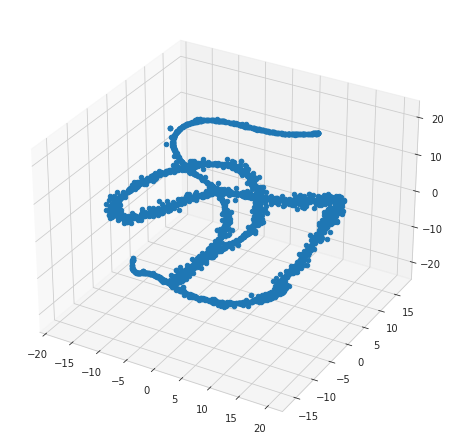

In [51]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)

x = x_coord
y = y_coord
z = z_coord


g = ax.scatter(x, y, z, marker='o', depthshade=False, cmap='Paired')

plt.show()

In [52]:
pca_result

0         1         2         3         4         5         6   \
0     0.461756 -0.018382 -0.000278 -0.008495 -0.004441  0.001382  0.005874   
1    -1.134150 -0.020371  0.004880 -0.002549  0.005067  0.001747 -0.001183   
2     0.400174 -0.009487 -0.003756 -0.006596 -0.005706  0.002409 -0.005636   
3    -1.061862  0.000066 -0.002637 -0.011781  0.007038 -0.001177  0.001853   
4    -0.133712 -0.009678 -0.000001 -0.004909 -0.003307  0.003448  0.000976   
...        ...       ...       ...       ...       ...       ...       ...   
2962  1.132327 -0.007086  0.006848  0.018180 -0.002348  0.000264 -0.008562   
2963  0.893009  0.008972 -0.009662  0.000713  0.005016 -0.001976 -0.002221   
2964 -1.539525  0.020992  0.011432 -0.005762 -0.000367  0.007719  0.002323   
2965  1.707514  0.003112 -0.003732 -0.002008  0.004086  0.000390  0.002031   
2966  3.095030 -0.001135  0.007824  0.023158  0.014850 -0.015651 -0.027823   

            7         8         9   ...        40        41        42  \
0     0.001922  0.000656 -0.000388  ...  0.002645 -0.004396  0.002355   
1     0.003246 -0.007677  0.003114  ... -0.000798  0.001461  0.000816   
2     0.002650 -0.007923 -0.001185  ...  0.001887  0.004993  0.002648   
3    -0.004889  0.001675 -0.002415  ...  0.001714 -0.001658  0.000521   
4    -0.000145 -0.000875  0.001491  ... -0.003332 -0.000213 -0.004024   
...        ...       ...       ...  ...       ...       ...       ...   
2962  0.005442  0.004869  0.000645  ...  0.004361  0.001818 -0.008377   
2963 -0.002758  0.004393 -0.002324  ...  0.001880  0.007242 -0.002547   
2964  0.001505 -0.001110 -0.001435  ...  0.001404 -0.000760  0.000271   
2965  0.005568 -0.002444 -0.005154  ...  0.000687 -0.001186 -0.002611   
2966  0.010056 -0.010532  0.011791  ...  0.008444  0.015764 -0.003651   

            43        44        45        46        47        48        49  
0    -0.000758  0.002260  0.004022 -0.003472  0.002587  0.000462  0.002846  
1    -0.002939 -0.002142  0.000804  0.006347 -0.000131 -0.001059 -0.002452  
2    -0.002274  0.001913 -0.001179  0.001120  0.002578 -0.005441 -0.000277  
3     0.001747 -0.002309  0.003279 -0.000500 -0.000874 -0.000546  0.002247  
4    -0.001193  0.004565  0.001146 -0.000024 -0.001631  0.004156 -0.003984  
...        ...       ...       ...       ...       ...       ...       ...  
2962  0.004561  0.000615 -0.005730 -0.004859 -0.002249 -0.002840  0.007499  
2963  0.001340 -0.003061 -0.001821  0.002117  0.000333 -0.000888  0.002071  
2964 -0.002846 -0.000418 -0.001804  0.000575  0.001523  0.001820  0.000746  
2965 -0.002078  0.000647 -0.002461 -0.001058  0.000053 -0.001665 -0.001399  
2966 -0.001175  0.007752 -0.018285 -0.000879 -0.007536  0.003439  0.007159  

[2967 rows x 50 columns]

## Color